# Jrfapp tutorial 3 
## Inverting real dataset for station CHBR with grid_search:

First we need to import Initialize and Jrfapp_station. You can perform it by:

In [21]:
from jrfapp.main_classes import Initialize
from jrfapp.main_classes import Jrfapp_station
import os

In this run we are going to use real dataset of CHBR station in the joint inversion framework. The sac file provided
in the station folder should have T0, Omarker, the USER4 must be ray parameter. We first need to create a Initialize object and refrence the data_folder and stations coordinate file. Similar to toturial 2, we can do it by:

In [22]:
## assigning folders and files needed for run.
# first define the package folder you downloaded from git.
package_folder = '/home/soroush/rf_shallow_codes/my_py_rf/Jrfapp_proj'
station_coordinate_file_path = os.path.join(package_folder, 'makran_coordinates')
data_folder_path = os.path.join(package_folder, 'makran_data')
output_folder_path = os.path.join(package_folder, 'jrfapp_output_real_gs')
model_folder_path = os.path.join(package_folder, 'model_folder')

In [23]:
init_obj = Initialize(network_name='MAKRAN', 
                                    station_coordinate_file= station_coordinate_file_path,
                                    data_folder= data_folder_path, 
                                    layering= [3, 4, 3], 
                                    model_folder = model_folder_path,
                                    output_folder= output_folder_path, 
                                    model_name= 'sedimentary',
                                    random_seed= 250)

The makran_coordinates file contains the station name, latitude and longitude. 
for example 
> CHBR    25.595      60.482

is one of the lines in makran_coordinates that correspond to CHBR station.

The data_folder is where we saved the dataset of CHBR station. the data_folder structures must be as follow:
> {data_folder}/{station_folder}/{event_folder}/*BHZ.SAC *BHE.SAC *BHN.SAC
> data_folder/CHBR/2017119105924/2017119105924_BHE.SAC,
> data_folder/CHBR/2017119105924/2017119105924_BHN.SAC,  
> data_folder/CHBR/2017119105924/2017119105924_BHZ.SAC.

Now we need to create Jrfapp_station with CHBR dataset. This can be done as follow:

In [24]:
jrfapp_stobj = Jrfapp_station(init_obj, name = 'CHBR')

Creating station CHBR 
found 1102 events from which 
 1090 had 3 waveforms
reading files for network = MAKRAN ,station = CHBR
all data saved for network= MAKRAN ,station= CHBR to:
/home/soroush/rf_shallow_codes/my_py_rf/Jrfapp_proj/jrfapp_output/MAKRAN_CHBR/MAKRAN_CHBR_all_data_bf_rf.bin
preparing files for rf calculation for network = MAKRAN station = CHBR
calculating RFs for network= MAKRAN, station= CHBR
all rfs saved for network= MAKRAN ,station= CHBR to:
/home/soroush/rf_shallow_codes/my_py_rf/Jrfapp_proj/jrfapp_output/MAKRAN_CHBR/MAKRAN_CHBR_all_rf_gf_3.5.bin
Start to stack in back azimuth bins before evaluating app vel, no of bins is: 24
Start to stack in back azimuth bins after evaluating app vel, no of bins is: 24


The backbone of Jrfapp_station is the Station_sor class. This class read the dataset, decimates and filters the data according to init_obj, and calculates RFs and Apparent velocities. Remove low-quality dataset, create several figures in output_folder/{station_name} folder, and prepare several stacks. 
These stacks are:
#### 1. "Linear Stack before app_vel criteria":  
> which is stacked RFs before
> removing RFs that produce apparent velocities lower than 
> min_app_vel and greater than max_app_vel defined in the Initialize 
> class. I don't recommend using this because unrealistic values for 
> Apparent velocities are possibly generated by noise in the dataset.            
#### 2. "Linear Stack after app_vel criteria", 
> which is stacked RFs before
> removing RFs that produce apparent velocities lower than 
> min_app_vel and greater than max_app_vel defined in the Initialize 
> class. This is the recommended parameter for inversion. 
            
#### 3. "Phase Weighted stack after app_vel criteria": 
> which is the phase 
> weighted stack of RFs after removing RFs which produce apparent
> velocities lower than min_app_vel and greater than max_app_vel
> defined in the Initialize class. I don't recommend using this
> because moveout correction didn't apply to RFs in the phase 
> weighted stacking process and most of the multiple is removed 
> from RF time series.
            
#### 4. "K0 Stack joint_harmonic before app_vel criteria": 
> K0 stack is 
> based on removing first-order variation of azimuthal difference in 
> RFs. The basic idea is to keep the bulk value of each phase in the 
> RFR time series. However, this stacking method needs a reliable dataset
> to constrain the azimuthal variation. This stack is the K0 stack before
> removing RFs that produce apparent velocities lower than 
> min_app_vel and greater than max_app_vel defined in the Initialize 
> class. I don't recommend using this unless you have enough back azimuth
> variation in a low-noise level dataset.
            
#### 5. "K0 Stack joint_harmonic after app_vel criteria": 
> like previous but
> After removing RFs that produce apparent velocities lower than 
> min_app_vel and greater than max_app_vel defined in the Initialize 
> class. You can use this when you have a very good back azimuth 
> variation.
           
#### 6. "Weighted Stack according to Number of trace in each bin before app_vel criteria":
> linear stack but weighted according to the
> number of traces in each bin of back azimuth. In the process of 
> creating the Station the back azimuth is divided into 24 bins and RFs in 
> each bin are stacked. This stacking method uses the number of RFs in 
> each stack as the weight for stacking all 24 bins. This 
> stack calculated before removing RFs that produce apparent velocities
> lower than min_app_vel and greater than max_app_vel defined in the
> Initialize class. I don't recommend using this cause of noises that
> produce unrealistic apparent velocity.
            
#### 8. "Weighted Stack according to Number of trace in each bin after app_vel criteria":
> same as 6 but after removing RFs which 
> produce apparent velocities lower than min_app_vel and greater 
> than max_app_vel defined in the Initialize class. You can use this
> when your RFs dominated by a specific back azimuth. 
            
#### 10. "Linear Stack of bins before app_vel criteria": 
> same as 1 but 
            each bins have a weight equal to 1.

#### 11. "Linear Stack of bins after app_vel criteria": 
> same as 8 but after 
> removing RFs that produce apparent velocities lower than min_app_vel 
> and greater than max_app_vel defined in the Initialize class.
      
#### 12. "synthetic":
> for inverting synthetic data made from real datasets.

<div class="alert alert-block alert-info">
<b>Tip:</b> It is good practice to save the jrfapp_stobj before performing inversion. you can do it as follow:
</div>

In [25]:
jrfapp_stobj_file_name = jrfapp_stobj.save_file(file_name='real_data_chbr_gs_bf_inv')

Saved to /home/soroush/rf_shallow_codes/my_py_rf/Jrfapp_proj/jrfapp_output/real_data_chbr_gs_bf_inv


Now we invert the 'Linear Stack after app_vel criteria' which is the default stack for each station inversion. This
can be done with either grid_search or PSO. For inversion using grid_search we have:

dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5===============================================
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5

dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with initial smoothing and damping factors. 
 smooth factor is :1.0 damp factor is : 0.5
dividing layers to 1
Runing with increased smoothing and damping factors. 
 smooth factor is :1.2 damp factor is : 0.55
dividing layers to 1
Runing with increased smoothing and damping factors. 
 smooth factor is :1.2 damp factor is : 0.55
dividing l

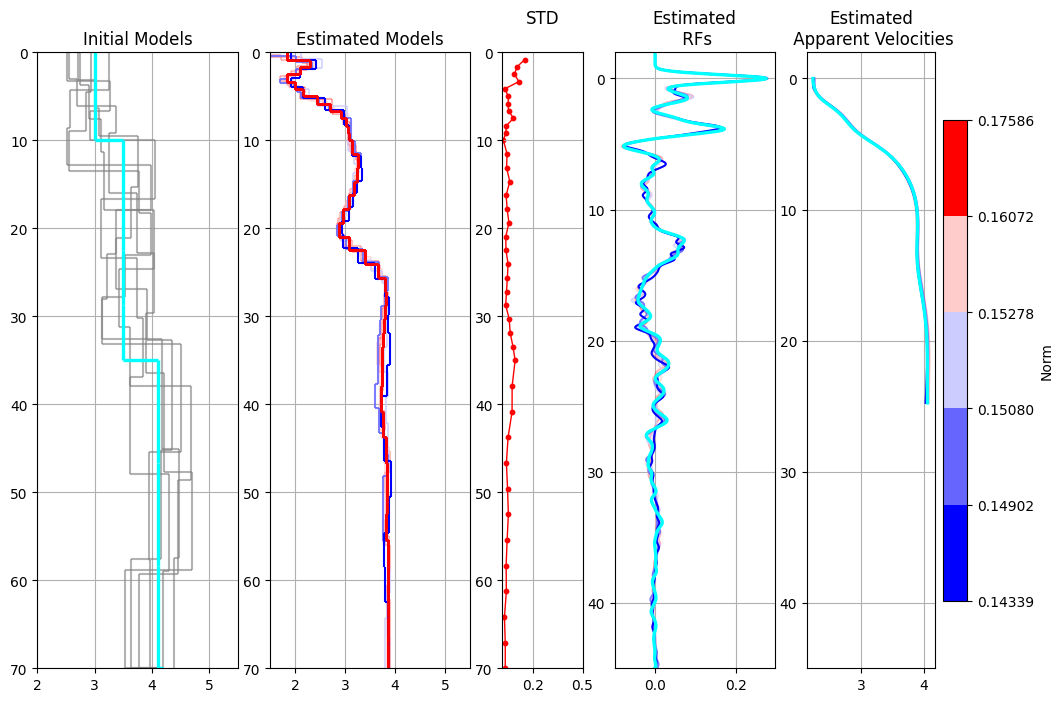

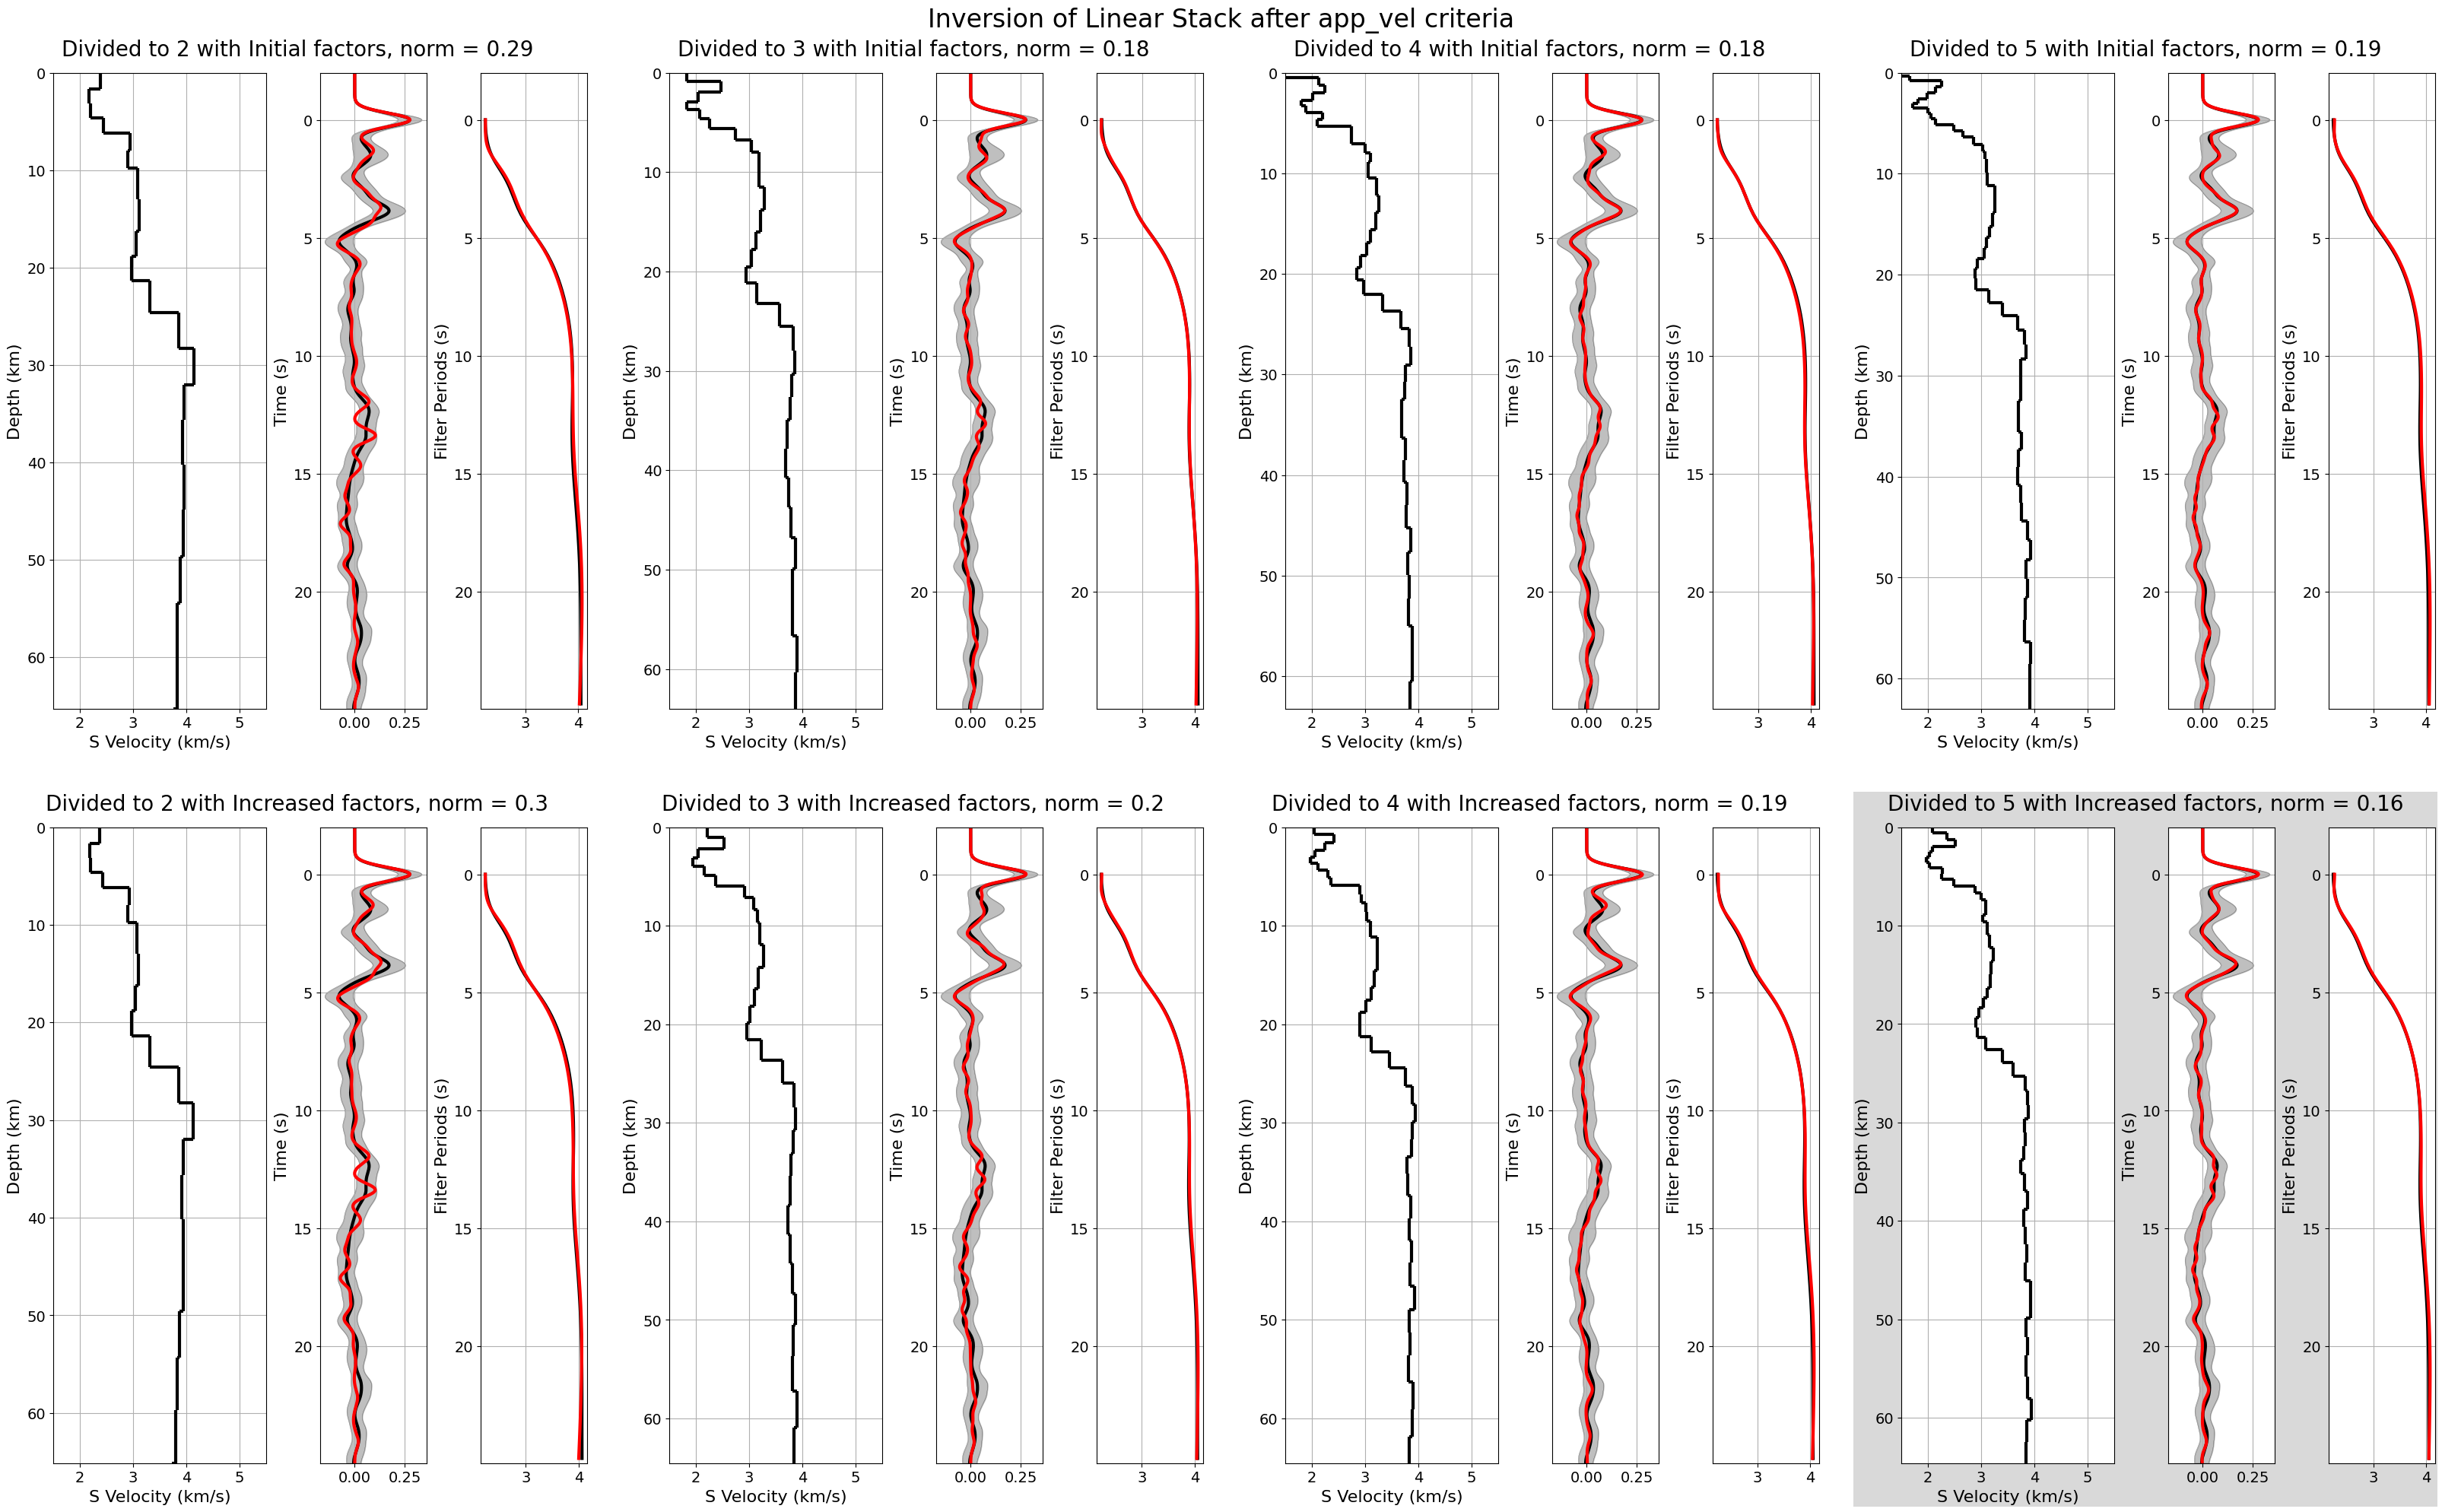

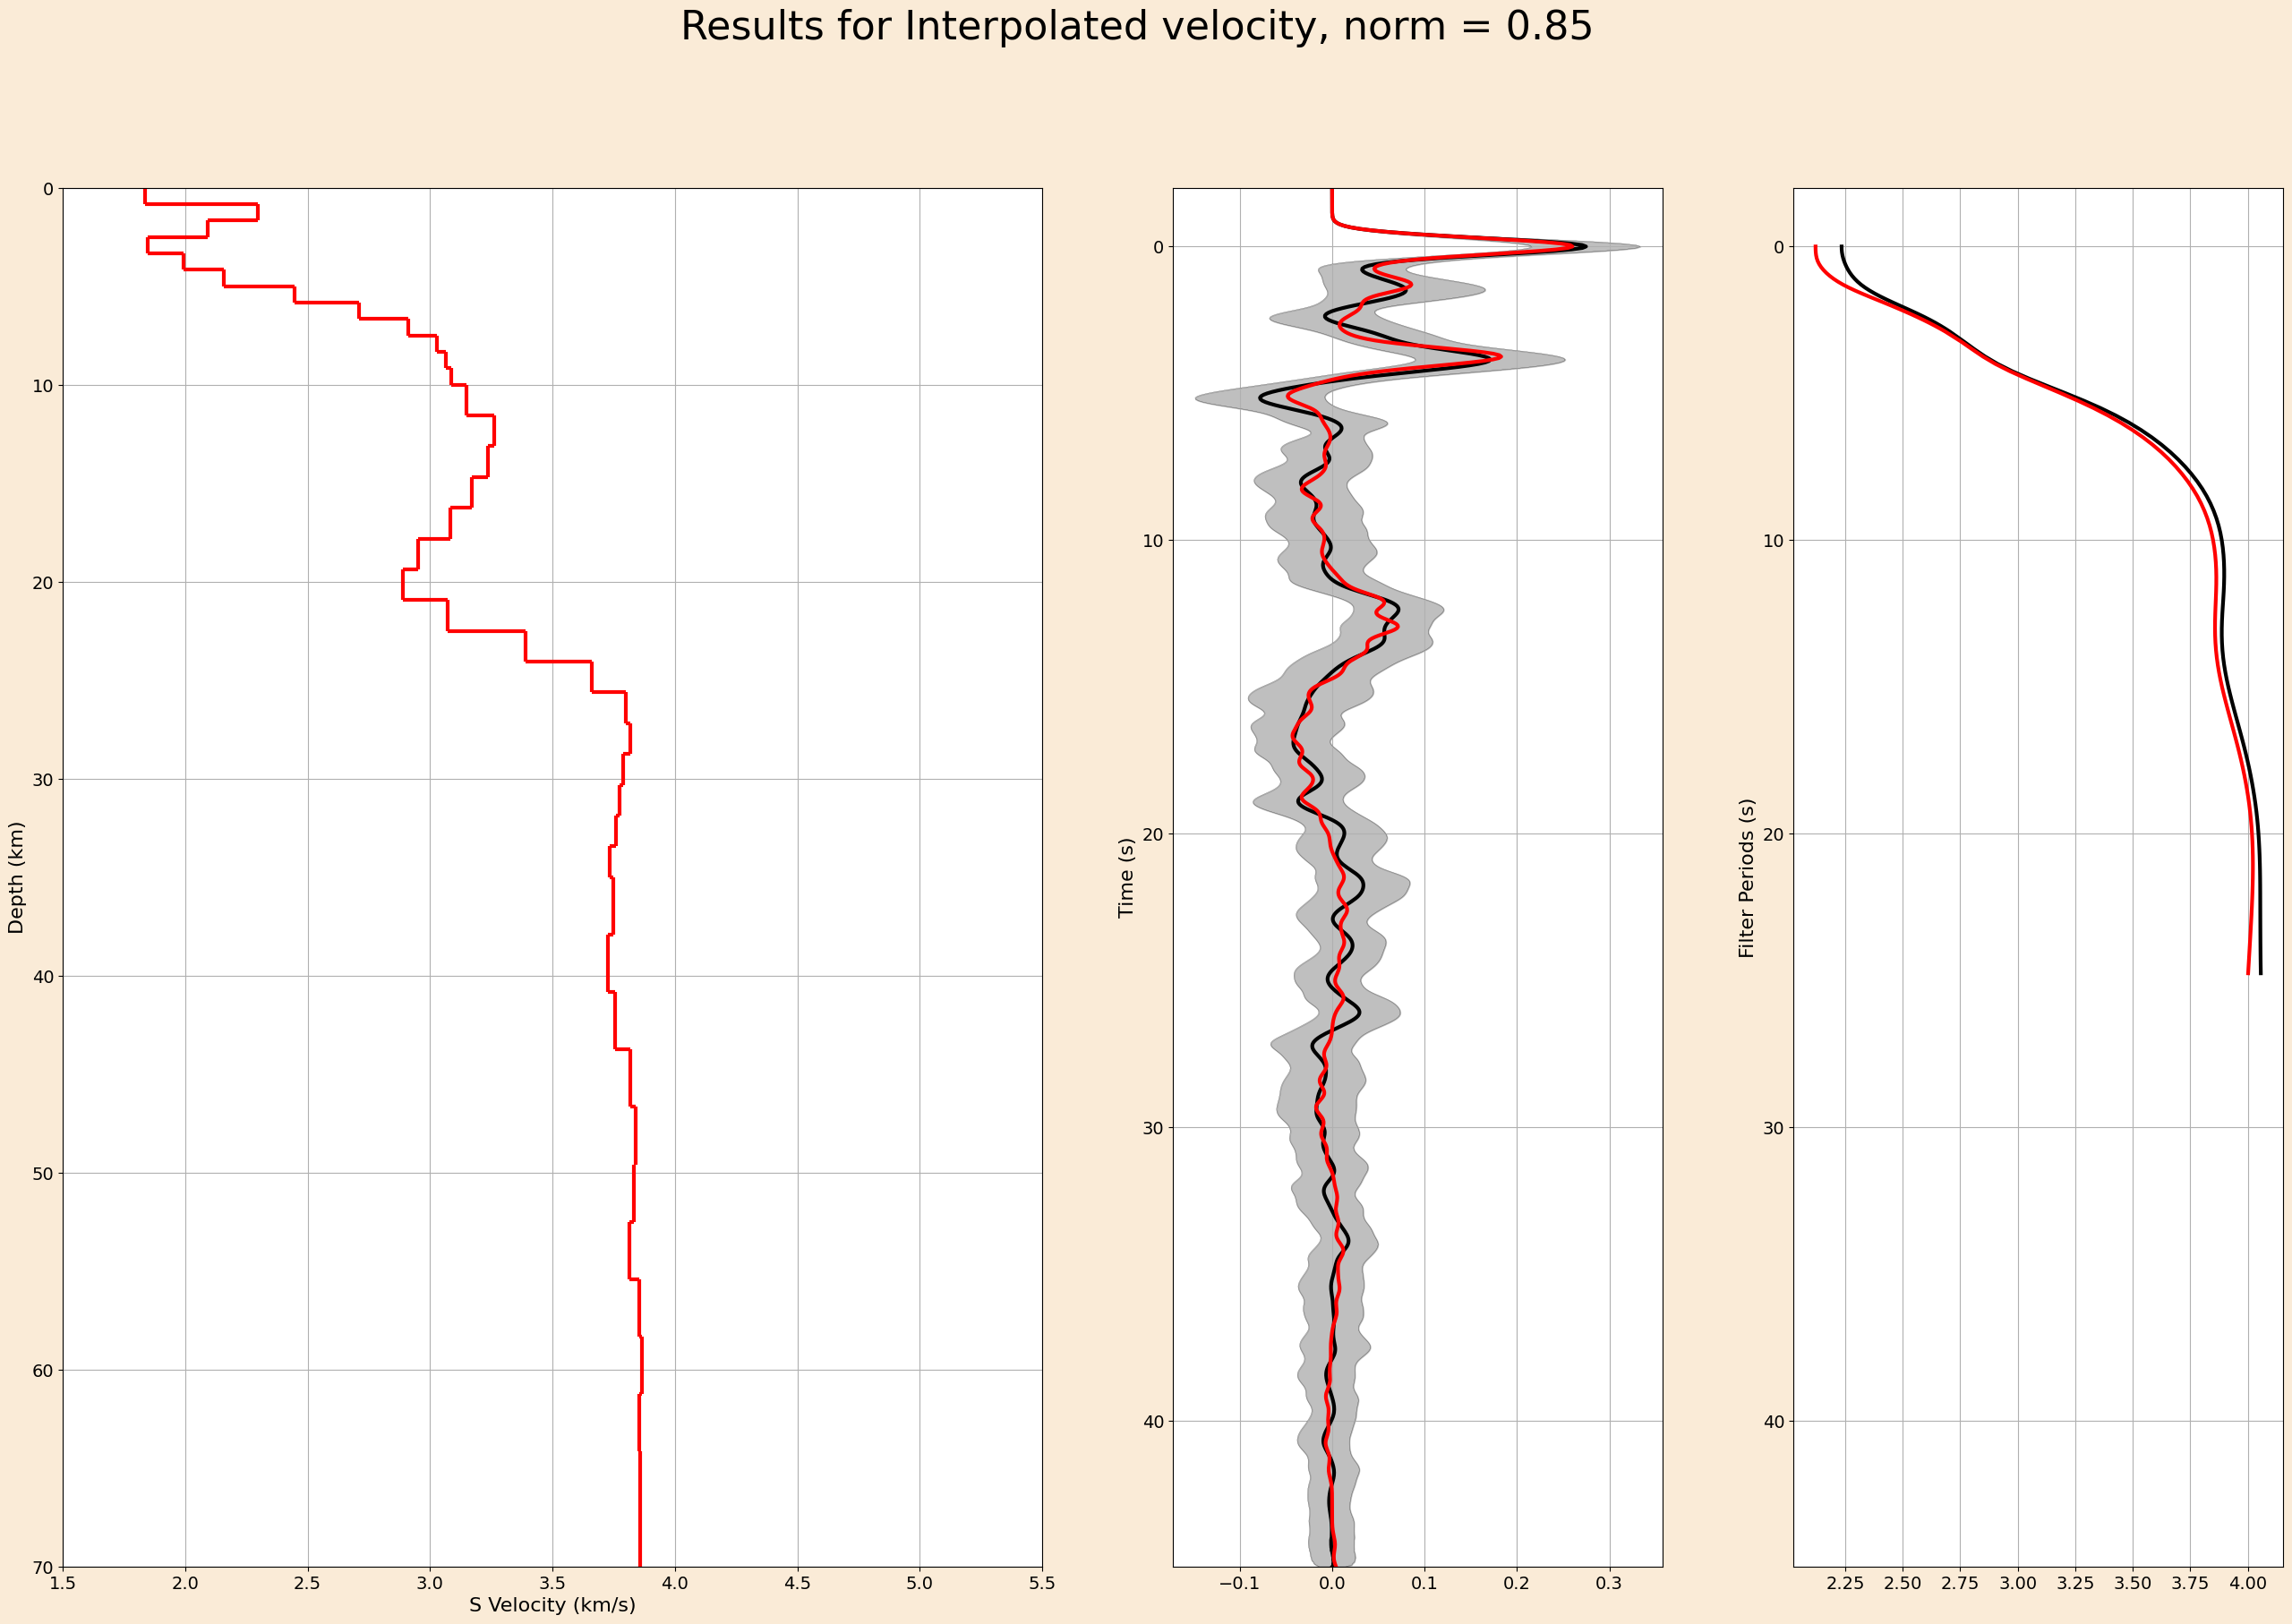

In [26]:
jrfapp_stobj.invert_data(inv_method = 'grid_search',
                stack_name = 'Linear Stack after app_vel criteria',
                ndivide_list = [-1, 1, -2, 2, -3, 3, -4, 4], 
                nmodel = 6, nthread = 6, 
                finer_ndivide= [-2, 2, -3, 3, -4, 4, -5, 5])

<div class="alert alert-block alert-info">
<b>Tip:</b> Again for simplicity i used 6 model in 6 thread.
</div>

The inversion output figures saved into the '/home/soroush/rf_shallow_codes/makran_data/pkg_test_real_chbr_gs/{network_name}_{station_name}/{stack_name}/'

These figures include the pseudo-initial model from grid_search which is the model that generates shear velocities that look similar 
to the mean estimated shear velocity from all models (the figure with subplots equal to the number of elements in finer_ndivide_list),  Output of mean shear velocity of all grid_search models and output of all shear velocity models used in grid_search.

<div class="alert alert-block alert-info">
<b>Tip:</b> We can save this station by:
</div>

In [27]:
jrfapp_stobj_file_name = jrfapp_stobj.save_file(file_name='real_data_chbr_gs_bf_inv')

Saved to /home/soroush/rf_shallow_codes/my_py_rf/Jrfapp_proj/jrfapp_output/real_data_chbr_gs_bf_inv


#### The inversion output of jrfapp_stobj is saved as a dictionary in jrfapp_stobj.inv_info. 
#### The inv_info dictionary contains several keys. These keys are:

1. all_iter:
> This is a list containing inversion information of the pseudo-initial model either from PSO or grid_search for all divisions according to
> to the finde_ndivide_list. Each inversion information for each iteration is a list that contains several parameters.
> for example jrfapp_stobj.inv_info['all_iter'][0] represents the inversion of the pseudo-initial model with layers divided into 2.
> This list contains these parameters:
> first argument (jrfapp_stobj.inv_info['all_iter'][0][0]) is a list that represents the layer thickness of the model before inversion,
> second argument (jrfapp_stobj.inv_info['all_iter'][0][1]) is a list that represents shear velocities before inversion.
> third argument (jrfapp_stobj.inv_info['all_iter'][0][2]) is an array that represents shear velocity after inversion (estimated).
> forth argument (jrfapp_stobj.inv_info['all_iter'][0][3]) is the norm of the difference between calculated and observed RFs after inversion.
> fifth argument (jrfapp_stobj.inv_info['all_iter'][0][4]) is the norm of the difference between calculated and observed apparent velocity after inversion.
> sixth argument (jrfapp_stobj.inv_info['all_iter'][0][5]) is calculated RFR.
> seventh argument (jrfapp_stobj.inv_info['all_iter'][0][6]) is the calculated apparent velocity.
> eighth argument (jrfapp_stobj.inv_info['all_iter'][0][7]) is the layer thickness after inversion (this is the layer thickness that you
> should use for plotting shear velocities).

2. best_inv:
> This is a list that contains the best model (according to the lowest norm of the difference between calculated and observed RFs and apparent
> velocities) from inversions with the different layering of the pseudo-initial model (best of all_iter).
> The structures of this list are similar to those explained above(initial_layer_thickness, initial_shear_velocity,
> estimated_shear_velocity, RF_norm, apparent_vel_norm, calculated_RFR, calculated_apparent_vel, estimated_layer_thickness).
> This is a key that you want to show in your outputs.

3. mean_vel_inv:
> similar to 2, but for the mean velocity of grid_search (in case you used grid_search as an inversion method).

4. name_pso:
> path to the output of the PSO algorithm in case you want to use force_load in inversion, you can use this filename. only for PSO
>  inversion method.

5. vel_param:
> Object of the velocity parameterization for the pseudo-initial model.
   